### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [ ]:
import ads

In [ ]:
ads.__version__

'2.5.4'

In [ ]:
from ads.dataset.factory import DatasetFactory

In [ ]:
ds_tratado = DatasetFactory.open('./db-doenca-cardiaca-final.csv')

loop1:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
ds_tratado

HTML(value='\n        <style>\n            .mostly-customized-scrollbar {\n              display: block;\n    …

6,954 rows, 15 columns

In [ ]:
type(ds_tratado)

ads.dataset.dataset.ADSDataset

In [ ]:
ds_tratado = ds_tratado.set_target('risco_DAC_decada')

In [ ]:
type(ds_tratado)

ads.dataset.classification_dataset.BinaryClassificationDataset

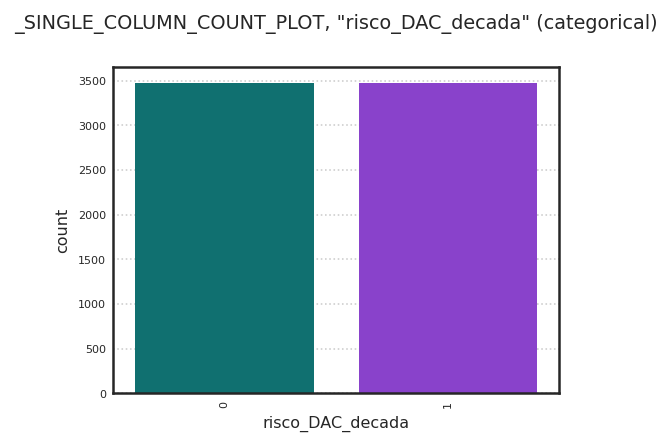

In [ ]:
ds_tratado.target.show_in_notebook()

In [ ]:
ds_tratado.show_in_notebook()

Accordion(children=(HTML(value='<h3>Type: BinaryClassificationDataset</h3><h3>6,954 Rows, 15 Columns</h3><h4>C…

In [ ]:
import numpy as np
np.random.seed(42)

In [ ]:
train, test = ds_tratado.train_test_split()

In [ ]:
train

Train Data
Shape of X:(6258, 14)
Shape of y:(6258,)

In [ ]:
train.X

sexo  idade  cigarros_por_dia  uso_medicamento_pressao  AVC  \
4782     1     49                20                      0.0    0   
208      0     43                 0                      0.0    0   
1373     1     42                20                      0.0    0   
6816     1     52                25                      0.0    0   
3357     1     45                20                      0.0    0   
...    ...    ...               ...                      ...  ...   
3772     1     43                20                      0.0    0   
5191     1     52                20                      0.0    0   
5226     0     60                 0                      0.0    0   
5390     1     54                43                      0.0    0   
860      1     37                 0                      0.0    0   

      hipertensao  diabetes  colesterol_total  pressao_arterial_sistolica  \
4782            1         0             193.0                       172.0   
208             0         0             263.0                       115.0   
1373            0         0             231.0                       123.0   
6816            1         0             206.0                       173.0   
3357            0         0             200.0                       113.0   
...           ...       ...               ...                         ...   
3772            0         0             184.0                       127.5   
5191            0         0             225.0                       126.0   
5226            1         0             334.0                       132.0   
5390            0         0             243.0                       135.0   
860             0         0             238.0                       121.0   

      pressao_arterial_diastolica    IMC  freq_cardiaca  glicemia  fumante  
4782                        105.0  19.70           90.0      77.0        2  
208                          82.5  25.91          105.0      81.8        0  
1373                         87.0  21.48           75.0      44.0        2  
6816                        117.0  29.63           75.0      77.0        3  
3357                         75.5  21.51           88.0      72.0        2  
...                           ...    ...            ...       ...      ...  
3772                         81.0  28.31          108.0      75.0        2  
5191                         75.0  22.18           85.0     100.0        2  
5226                         94.0  25.38           80.0      98.0        0  
5390                         92.0  31.30           90.0      65.0        3  
860                          80.0  28.95           70.0      67.0        0  

[6258 rows x 14 columns]

In [ ]:
train.y

4782    1
208     0
1373    0
6816    1
3357    0
       ..
3772    0
5191    1
5226    1
5390    1
860     0
Name: risco_DAC_decada, Length: 6258, dtype: int64

In [ ]:
test.X

sexo  idade  cigarros_por_dia  uso_medicamento_pressao  AVC  \
5487     1     61                15                      0.0    0   
5489     0     50                 0                      0.0    0   
2133     1     42                20                      0.0    0   
37       1     52                 0                      0.0    0   
2063     1     42                 0                      0.0    0   
...    ...    ...               ...                      ...  ...   
5861     1     62                 0                      0.0    0   
5465     1     67                15                      0.0    1   
2509     0     57                 0                      0.0    0   
6261     1     56                20                      0.0    0   
4240     1     46                30                      0.0    0   

      hipertensao  diabetes  colesterol_total  pressao_arterial_sistolica  \
5487            0         0             204.0                       120.0   
5489            1         0             236.0                       152.0   
2133            0         0             182.0                       120.0   
37              1         1             178.0                       160.0   
2063            0         0             258.0                       110.0   
...           ...       ...               ...                         ...   
5861            1         0             208.0                       144.0   
5465            1         0             285.0                       155.0   
2509            1         0             382.0                       133.0   
6261            1         0             205.0                       210.0   
4240            1         0             187.0                       140.0   

      pressao_arterial_diastolica    IMC  freq_cardiaca  glicemia  fumante  
5487                         80.0  25.71           80.0      83.0        2  
5489                         92.0  24.47          120.0      67.0        0  
2133                         83.0  27.26           85.0      87.0        2  
37                           98.0  40.11           75.0     225.0        0  
2063                         69.0  26.25           60.0      73.0        0  
...                           ...    ...            ...       ...      ...  
5861                         80.0  31.42           75.0      66.0        0  
5465                         90.0  30.42           70.0      77.0        2  
2509                         77.0  24.27           75.0      81.0        0  
6261                        130.0  25.49           95.0     127.0        2  
4240                         94.0  24.30          100.0      67.0        3  

[696 rows x 14 columns]

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classificador_padrao = DecisionTreeClassifier()

In [ ]:
classificador_padrao.fit(X=train.X, y=train.y)

DecisionTreeClassifier()

In [ ]:
classificador_padrao.score(X=test.X, y=test.y)

0.8979885057471264

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

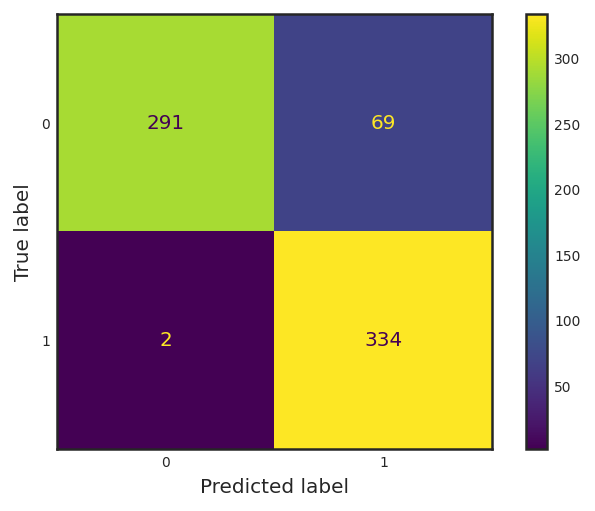

In [ ]:
ConfusionMatrixDisplay.from_estimator(estimator=classificador_padrao, X=test.X, y=test.y)

In [ ]:
classificador_profundo = DecisionTreeClassifier(max_depth=100)

In [ ]:
classificador_profundo.fit(X=train.X, y=train.y)

DecisionTreeClassifier(max_depth=100)

In [ ]:
classificador_profundo.score(X=test.X, y=test.y)

0.9051724137931034

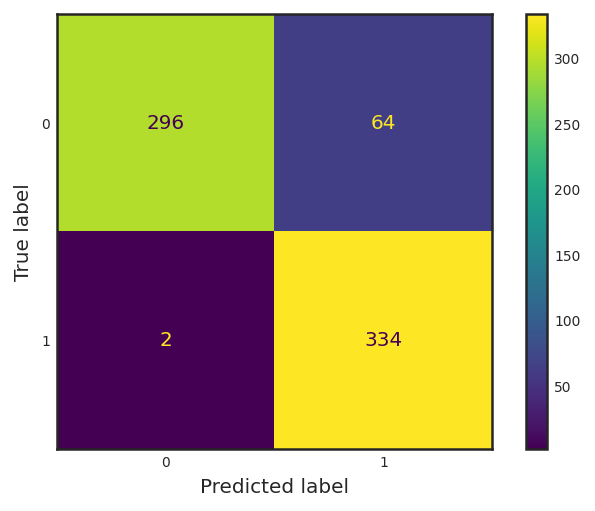

In [ ]:
ConfusionMatrixDisplay.from_estimator(estimator=classificador_profundo, X=test.X, y=test.y)

In [ ]:
classificador_padrao.feature_importances_

array([0.01803655, 0.1761304 , 0.0443429 , 0.00487037, 0.00359109,
       0.01008645, 0.00059353, 0.13396885, 0.13567256, 0.11551401,
       0.14654085, 0.0870228 , 0.11280503, 0.01082462])

In [ ]:
import pandas as pd

In [ ]:
pd.Series(data=classificador_padrao.feature_importances_, index=test.X.columns).sort_values()

diabetes                       0.000594
AVC                            0.003591
uso_medicamento_pressao        0.004870
hipertensao                    0.010086
fumante                        0.010825
sexo                           0.018037
cigarros_por_dia               0.044343
freq_cardiaca                  0.087023
glicemia                       0.112805
pressao_arterial_diastolica    0.115514
colesterol_total               0.133969
pressao_arterial_sistolica     0.135673
IMC                            0.146541
idade                          0.176130
dtype: float64

In [ ]:
train.X.drop('diabetes', axis=1, inplace=True)

In [ ]:
test.X.drop('diabetes', axis=1, inplace=True)

In [ ]:
classificador_padrao = DecisionTreeClassifier()

In [ ]:
classificador_padrao.fit(X=train.X, y=train.y)

DecisionTreeClassifier()

In [ ]:
classificador_padrao.score(X=test.X, y=test.y)

0.9037356321839081

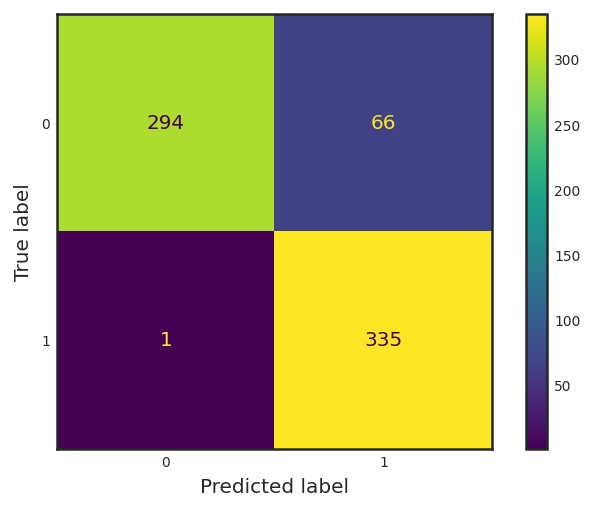

In [ ]:
ConfusionMatrixDisplay.from_estimator(estimator=classificador_padrao, X=test.X, y=test.y)

In [ ]:
from ads.common.data import ADSData

In [ ]:
data_ads = ADSData().build(ds_tratado.to_pandas(), 'risco_DAC_decada')

In [ ]:
data_ads


Shape of X:(6954, 14)
Shape of y:(6954,)

In [ ]:
from ads.automl.driver import AutoML

In [ ]:
oracle_automl = AutoML(data_ads)

In [ ]:
automl_model1, baseline = oracle_automl.train(model_list=['RandomForestClassifier', 'DecisionTreeClassifier', 'SVC','LogisticRegression'],
                                              score_metric='accuracy', time_budget=150)

INFO:xengine:All work stopped
INFO:xengine:All work stopped


In [ ]:
oracle_automl.print_trials(max_rows=20, sort_column='Mean Validation Score')

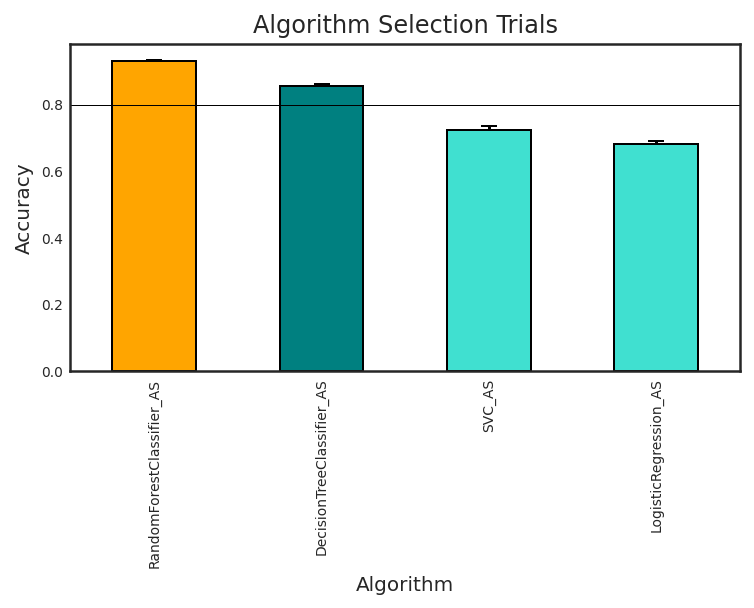

In [ ]:
oracle_automl.visualize_algorithm_selection_trials()

In [ ]:
automl_model1.show_in_notebook()

[['Model Name', 'AutoML Classifier'],
 ['Target Variable', 'risco_DAC_decada'],
 ['Selected Algorithm', 'RandomForestClassifier'],
 ['Task', 'classification'],
 ['Training Dataset Size', (6954, 14)],
 ['CV', 5],
 ['Optimization Metric', 'accuracy'],
 ['Selected Hyperparameters',
  {'bootstrap': True,
   'ccp_alpha': 0.0,
   'class_weight': 'balanced',
   'criterion': 'gini',
   'max_depth': None,
   'max_features': 0.777777778,
   'max_leaf_nodes': None,
   'max_samples': None,
   'min_impurity_decrease': 0.0,
   'min_samples_leaf': 0.000625,
   'min_samples_split': 0.00125,
   'min_weight_fraction_leaf': 0.0,
   'n_estimators': 101,
   'n_jobs': 8,
   'oob_score': False,
   'random_state': 7,
   'verbose': 0,
   'warm_start': False}],
 ['Initial Number of Features', 14],
 ['Initial Features',
  Index(['sexo', 'idade', 'cigarros_por_dia', 'uso_medicamento_pressao', 'AVC',
         'hipertensao', 'diabetes', 'colesterol_total',
         'pressao_arterial_sistolica', 'pressao_arterial_di

  ax.plot(n_features, scores, "k:", marker="s", color="teal", markersize=3)



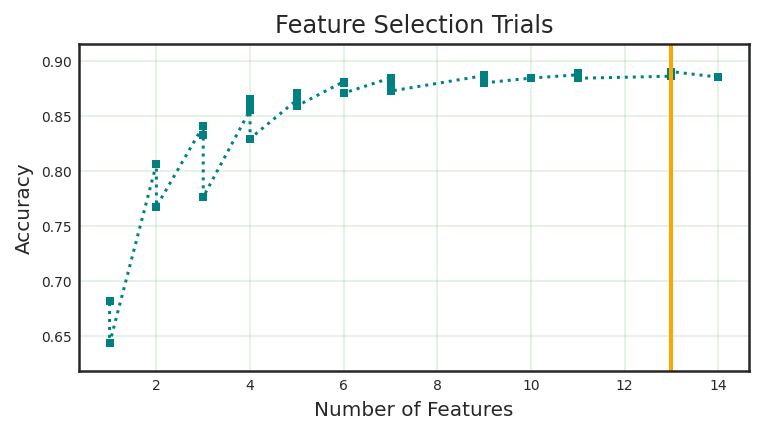

In [ ]:
oracle_automl.visualize_feature_selection_trials()

In [ ]:
automl_model1.feature_names()

Index(['sexo', 'idade', 'cigarros_por_dia', 'uso_medicamento_pressao',
       'hipertensao', 'diabetes', 'colesterol_total',
       'pressao_arterial_sistolica', 'pressao_arterial_diastolica', 'IMC',
       'freq_cardiaca', 'glicemia', 'fumante'],
      dtype='object')

In [ ]:
train, test = ds_tratado[['sexo', 'idade', 'cigarros_por_dia', 'uso_medicamento_pressao',
       'hipertensao', 'diabetes', 'colesterol_total',
       'pressao_arterial_sistolica', 'pressao_arterial_diastolica', 'IMC',
       'freq_cardiaca', 'glicemia', 'fumante', 'risco_DAC_decada']].train_test_split()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
automl_model1.summary()

Framework: sklearn.ensemble._forest
Estimator class: RandomForestClassifier
Model Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 0.777777778, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 0.000625, 'min_samples_split': 0.00125, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 101, 'n_jobs': 8, 'oob_score': False, 'random_state': 7, 'verbose': 0, 'warm_start': False}



In [ ]:
param_modelo = {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 0.777777778, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 0.000625, 'min_samples_split': 0.00125, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': 8, 'oob_score': False, 'random_state': 7, 'verbose': 0, 'warm_start': False}
param_modelo

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.777777778,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 0.000625,
 'min_samples_split': 0.00125,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 8,
 'oob_score': False,
 'random_state': 7,
 'verbose': 0,
 'warm_start': False}

In [ ]:
best_model = RandomForestClassifier(**param_modelo)

In [ ]:
classificador = DecisionTreeClassifier(max_depth=100)

In [ ]:
best_model.fit(train.X, train.y)
classificador.fit(train.X, train.y)

DecisionTreeClassifier(max_depth=100)

In [ ]:
from ads.common.model import ADSModel

In [ ]:
ads_best_model = ADSModel.from_estimator(best_model, name='Modelo AutoML')
ads_classificador = ADSModel.from_estimator(classificador, name='Modelo Manual')

In [ ]:
from ads.evaluations.evaluator import ADSEvaluator

In [ ]:
evaluator = ADSEvaluator(test_data=test, models=[ads_best_model, ads_classificador], training_data=train)

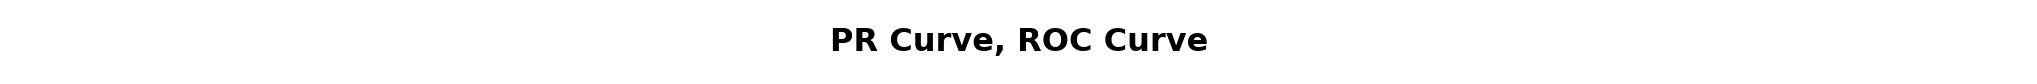

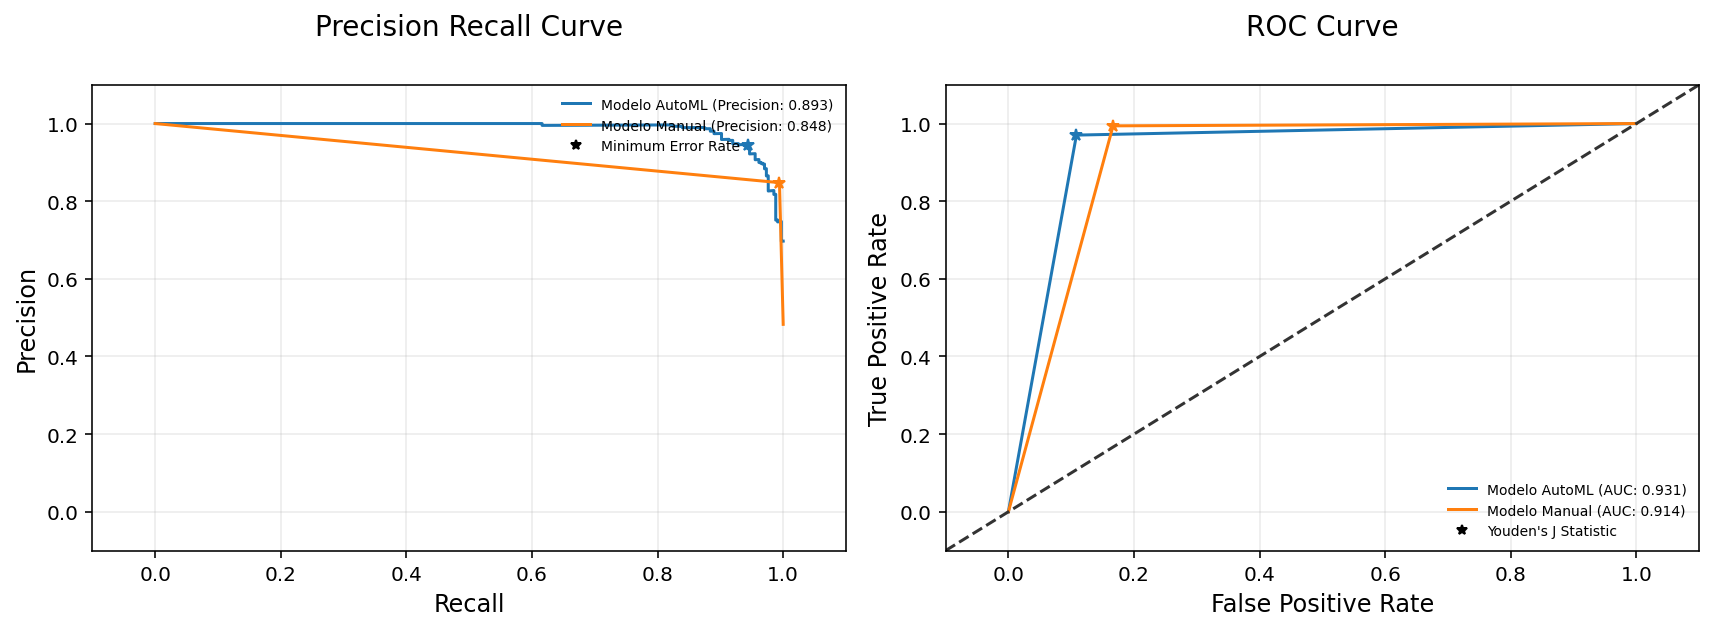

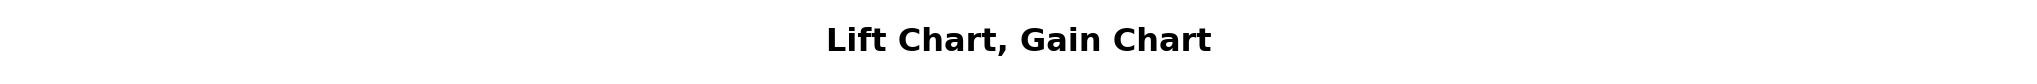

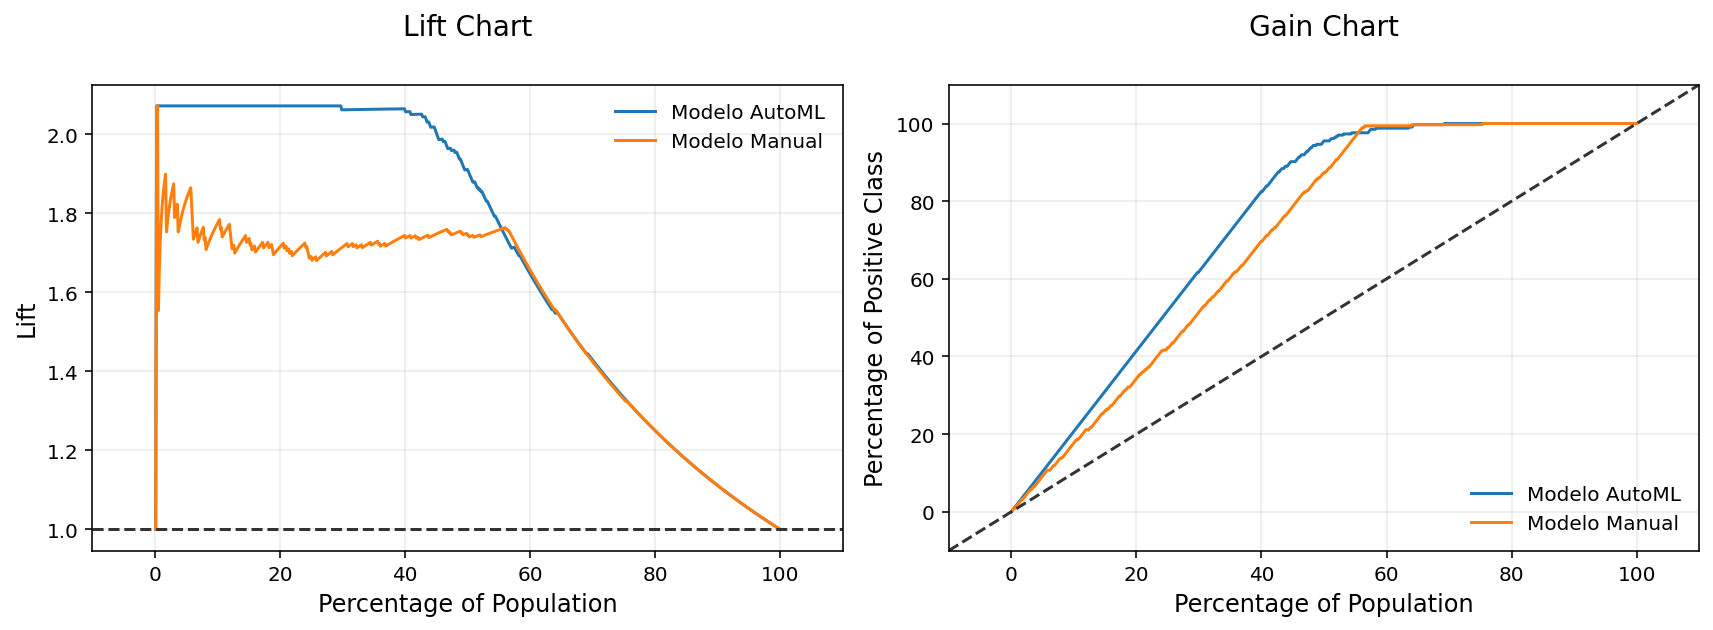

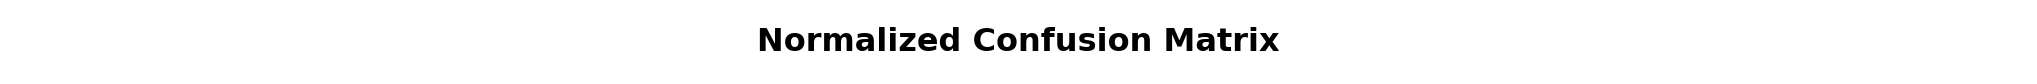

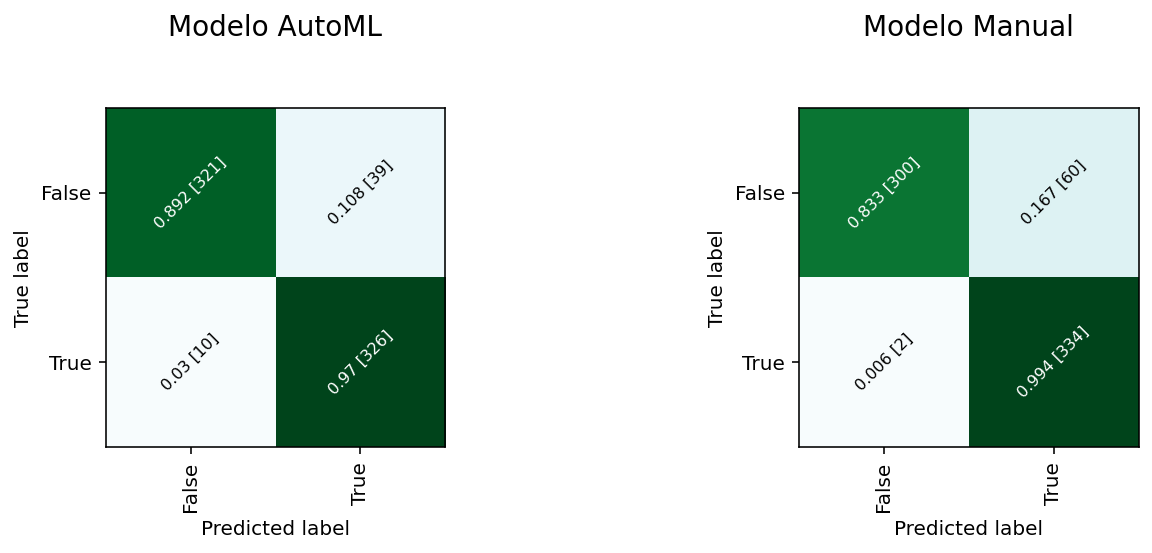

In [ ]:
evaluator.show_in_notebook()

In [ ]:
evaluator.metrics

  .set_precision(precision)



HTML(value='<style type="text/css">\n#T_aa79b_row0_col0, #T_aa79b_row1_col1, #T_aa79b_row2_col0, #T_aa79b_row3…

HTML(value='<style type="text/css">\n#T_ec94f_row0_col0, #T_ec94f_row1_col1, #T_ec94f_row2_col0, #T_ec94f_row3…

In [ ]:
classificador = DecisionTreeClassifier(max_depth=5).fit(train.X, train.y)

In [ ]:
ads_classificador = ADSModel.from_estimator(classificador, name='Modelo Manual')

In [ ]:
evaluator = ADSEvaluator(test, models=[ads_best_model, ads_classificador], training_data=train)

In [ ]:
evaluator.metrics

  .set_precision(precision)



HTML(value='<style type="text/css">\n#T_d13bd_row0_col0, #T_d13bd_row1_col1, #T_d13bd_row2_col0, #T_d13bd_row3…

HTML(value='<style type="text/css">\n#T_4411a_row0_col0, #T_4411a_row1_col1, #T_4411a_row2_col0, #T_4411a_row3…

In [ ]:
from ads.explanations.explainer import ADSExplainer

In [ ]:
explainer = ADSExplainer(test, ads_best_model, train)

In [ ]:
global_explainer = explainer.global_explanation()

In [ ]:
importance = global_explainer.compute_feature_importance()

MLXProgBar:   0%|          | 0/20 [00:00<?, ?it/s]

MLXProgBar:   0%|          | 0/3 [00:00<?, ?it/s]

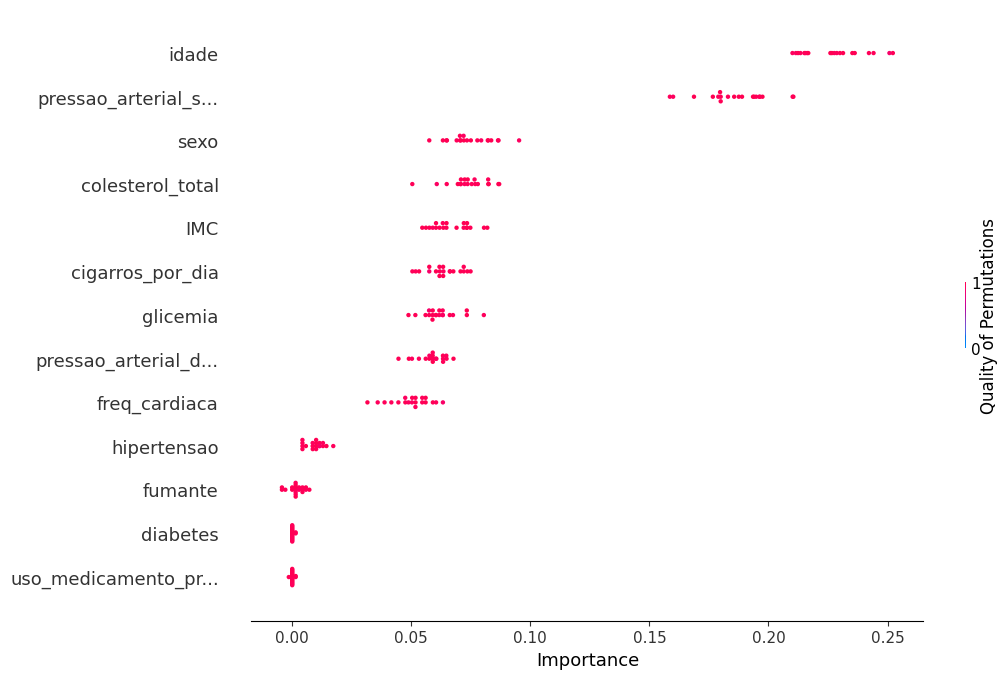

In [ ]:
importance.show_in_notebook('detailed')

In [ ]:
pdp_idade = global_explainer.compute_partial_dependence('idade')

MLXProgBar:   0%|          | 0/30 [00:00<?, ?it/s]

In [ ]:
pdp_pressao = global_explainer.compute_partial_dependence("PRESSAO_ARTERIAL_DIASTOLICA")

MLXProgBar:   0%|          | 0/30 [00:00<?, ?it/s]

In [ ]:
pdp_pressao.show_in_notebook()

In [ ]:
pdp_idade.show_in_notebook()

In [ ]:
local_explainer = explainer.local_explanation()

In [ ]:
test.X.iloc[[13]]

sexo  idade  cigarros_por_dia  uso_medicamento_pressao  hipertensao  \
3332     0     62                 0                      0.0            1   

      diabetes  colesterol_total  pressao_arterial_sistolica  \
3332         0             312.0                       156.0   

      pressao_arterial_diastolica    IMC  freq_cardiaca  glicemia  fumante  
3332                        105.0  22.35           77.0      82.0        0

In [ ]:
test.y.iloc[[13]]

3332    0
Name: risco_DAC_decada, dtype: int64

In [ ]:
explanation = local_explainer.explain(test.X.iloc[[13]], test.y.iloc[[13]])

MLXProgBar:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
explanation.show_in_notebook()

In [ ]:
best_model = RandomForestClassifier(**param_modelo)

In [ ]:
automl_model1.feature_names()

Index(['sexo', 'idade', 'cigarros_por_dia', 'uso_medicamento_pressao',
       'hipertensao', 'diabetes', 'colesterol_total',
       'pressao_arterial_sistolica', 'pressao_arterial_diastolica', 'IMC',
       'freq_cardiaca', 'glicemia', 'fumante'],
      dtype='object')

In [ ]:
best_model.fit(ds_tratado[['sexo', 'idade', 'cigarros_por_dia', 'uso_medicamento_pressao',
       'hipertensao', 'diabetes', 'colesterol_total',
       'pressao_arterial_sistolica', 'pressao_arterial_diastolica', 'IMC',
       'freq_cardiaca', 'glicemia', 'fumante']],ds_tratado['risco_DAC_decada'])

RandomForestClassifier(max_features=0.777777778, min_samples_leaf=0.000625,
                       min_samples_split=0.00125, n_jobs=8, random_state=7)

In [ ]:
ads_best_model = ADSModel.from_estimator(best_model, name='Modelo AutoML')

In [ ]:
path_artifact = '/home/datascience/modelo'

In [ ]:
artifact_model = ads_best_model.prepare(path_artifact, data_sample=test, data_science_env=True, force_overwrite=True)

loop1:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
artifact_model.save(display_name='Modelo de classificação DAC')

loop1:   0%|          | 0/5 [00:00<?, ?it/s]

artifact:/tmp/saved_model_0268f454-0f98-46f1-9cc4-df123a0e1117.zip


<style type="text/css">
#T_c0b25_row0_col0, #T_c0b25_row1_col0, #T_c0b25_row2_col0, #T_c0b25_row3_col0, #T_c0b25_row4_col0, #T_c0b25_row5_col0, #T_c0b25_row6_col0, #T_c0b25_row7_col0, #T_c0b25_row8_col0, #T_c0b25_row9_col0, #T_c0b25_row10_col0, #T_c0b25_row11_col0, #T_c0b25_row12_col0 {
  margin-left: 0px;
}
</style>
<table id="T_c0b25_">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th class="col_heading level0 col0" ></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_c0b25_level0_row0" class="row_heading level0 row0" >display_name</th>
      <td id="T_c0b25_row0_col0" class="data row0 col0" >Modelo de classificação DAC</td>
    </tr>
    <tr>
      <th id="T_c0b25_level0_row1" class="row_heading level0 row1" >freeform_tags</th>
      <td id="T_c0b25_row1_col0" class="data row1 col0" >{}</td>
    </tr>
    <tr>
      <th id="T_c0b25_level0_row2" class="row_heading level0 row2" >defined_tags</th>
      <td id="T_c0b25_row2_col0" class="data row2 col0" >{'Oracle-Tags': {'CreatedBy': 'oracleidentitycloudservice/igor.nascimento@alura.com.br', 'CreatedOn': '2022-02-17T02:49:54.192Z'}}</td>
    </tr>
    <tr>
      <th id="T_c0b25_level0_row3" class="row_heading level0 row3" >repository_url</th>
      <td id="T_c0b25_row3_col0" class="data row3 col0" >None</td>
    </tr>
    <tr>
      <th id="T_c0b25_level0_row4" class="row_heading level0 row4" >git_branch</th>
      <td id="T_c0b25_row4_col0" class="data row4 col0" >None</td>
    </tr>
    <tr>
      <th id="T_c0b25_level0_row5" class="row_heading level0 row5" >git_commit</th>
      <td id="T_c0b25_row5_col0" class="data row5 col0" >None</td>
    </tr>
    <tr>
      <th id="T_c0b25_level0_row6" class="row_heading level0 row6" >script_dir</th>
      <td id="T_c0b25_row6_col0" class="data row6 col0" >/home/datascience/modelo</td>
    </tr>
    <tr>
      <th id="T_c0b25_level0_row7" class="row_heading level0 row7" >training_script</th>
      <td id="T_c0b25_row7_col0" class="data row7 col0" >None</td>
    </tr>
    <tr>
      <th id="T_c0b25_level0_row8" class="row_heading level0 row8" >training_id</th>
      <td id="T_c0b25_row8_col0" class="data row8 col0" >ocid1.datasciencenotebooksession.oc1.sa-saopaulo-1.amaaaaaamkyaveaapmozousos7dxxjwzariim55up7keoz22wfl5ogfkxtaa</td>
    </tr>
    <tr>
      <th id="T_c0b25_level0_row9" class="row_heading level0 row9" >schema_input</th>
      <td id="T_c0b25_row9_col0" class="data row9 col0" >{'schema': [{'dtype': 'float64', 'feature_type': 'Continuous', 'name': 'colesterol_total', 'domain': {'values': 'Continuous', 'stats': {'count': 696.0, 'mean': 239.21, 'standard deviation': 43.847, 'sample minimum': 113.0, 'lower quartile': 209.75, 'median': 238.0, 'upper quartile': 264.0, 'sample maximum': 432.0, 'skew': 0.478}, 'constraints': []}, 'required': True, 'description': 'colesterol_total'}, {'dtype': 'float64', 'feature_type': 'Continuous', 'name': 'pressao_arterial_sistolica', 'domain': {'values': 'Continuous', 'stats': {'count': 696.0, 'mean': 136.982, 'standard deviation': 24.963, 'sample minimum': 85.5, 'lower quartile': 120.0, 'median': 132.0, 'upper quartile': 148.25, 'sample maximum': 248.0, 'skew': 1.284}, 'constraints': []}, 'required': True, 'description': 'pressao_arterial_sistolica'}, {'dtype': 'int64', 'feature_type': 'Integer', 'name': 'hipertensao', 'domain': {'values': 'Integer', 'stats': {'count': 696.0, 'mean': 0.39798850574712646, 'standard deviation': 0.4898350682753292, 'sample minimum': 0.0, 'lower quartile': 0.0, 'median': 0.0, 'upper quartile': 1.0, 'sample maximum': 1.0}, 'constraints': []}, 'required': True, 'description': 'hipertensao'}, {'dtype': 'int64', 'feature_type': 'Integer', 'name': 'diabetes', 'domain': {'values': 'Integer', 'stats': {'count': 696.0, 'mean': 0.0603448275862069, 'standard deviation': 0.23829586000195419, 'sample minimum': 0.0, 'lower quartile': 0.0, 'median': 0.0, 'upper quartile': 0.0, 'sample maximum': 1.0}, 'constraints': []}, 'required': True, 'descri

In [ ]:
from ads.catalog.model import ModelCatalog

In [ ]:
mc = ModelCatalog()

In [ ]:
mc_list = mc.list_models()

In [ ]:
mc_list[0]

<style type="text/css">
#T_b9138_row0_col0, #T_b9138_row1_col0, #T_b9138_row2_col0, #T_b9138_row3_col0, #T_b9138_row4_col0, #T_b9138_row5_col0, #T_b9138_row6_col0, #T_b9138_row7_col0, #T_b9138_row8_col0, #T_b9138_row9_col0, #T_b9138_row10_col0, #T_b9138_row11_col0, #T_b9138_row12_col0 {
  margin-left: 0px;
}
</style>
<table id="T_b9138_">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th class="col_heading level0 col0" ></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_b9138_level0_row0" class="row_heading level0 row0" >display_name</th>
      <td id="T_b9138_row0_col0" class="data row0 col0" >Modelo de classificação DAC</td>
    </tr>
    <tr>
      <th id="T_b9138_level0_row1" class="row_heading level0 row1" >freeform_tags</th>
      <td id="T_b9138_row1_col0" class="data row1 col0" >{}</td>
    </tr>
    <tr>
      <th id="T_b9138_level0_row2" class="row_heading level0 row2" >defined_tags</th>
      <td id="T_b9138_row2_col0" class="data row2 col0" >{'Oracle-Tags': {'CreatedBy': 'oracleidentitycloudservice/igor.nascimento@alura.com.br', 'CreatedOn': '2022-02-17T02:49:54.192Z'}}</td>
    </tr>
    <tr>
      <th id="T_b9138_level0_row3" class="row_heading level0 row3" >repository_url</th>
      <td id="T_b9138_row3_col0" class="data row3 col0" >None</td>
    </tr>
    <tr>
      <th id="T_b9138_level0_row4" class="row_heading level0 row4" >git_branch</th>
      <td id="T_b9138_row4_col0" class="data row4 col0" >None</td>
    </tr>
    <tr>
      <th id="T_b9138_level0_row5" class="row_heading level0 row5" >git_commit</th>
      <td id="T_b9138_row5_col0" class="data row5 col0" >None</td>
    </tr>
    <tr>
      <th id="T_b9138_level0_row6" class="row_heading level0 row6" >script_dir</th>
      <td id="T_b9138_row6_col0" class="data row6 col0" >/home/datascience/modelo</td>
    </tr>
    <tr>
      <th id="T_b9138_level0_row7" class="row_heading level0 row7" >training_script</th>
      <td id="T_b9138_row7_col0" class="data row7 col0" >None</td>
    </tr>
    <tr>
      <th id="T_b9138_level0_row8" class="row_heading level0 row8" >training_id</th>
      <td id="T_b9138_row8_col0" class="data row8 col0" >ocid1.datasciencenotebooksession.oc1.sa-saopaulo-1.amaaaaaamkyaveaapmozousos7dxxjwzariim55up7keoz22wfl5ogfkxtaa</td>
    </tr>
    <tr>
      <th id="T_b9138_level0_row9" class="row_heading level0 row9" >schema_input</th>
      <td id="T_b9138_row9_col0" class="data row9 col0" >{'schema': [{'dtype': 'float64', 'feature_type': 'Continuous', 'name': 'colesterol_total', 'domain': {'values': 'Continuous', 'stats': {'count': 696.0, 'mean': 239.21, 'standard deviation': 43.847, 'sample minimum': 113.0, 'lower quartile': 209.75, 'median': 238.0, 'upper quartile': 264.0, 'sample maximum': 432.0, 'skew': 0.478}, 'constraints': []}, 'required': True, 'description': 'colesterol_total'}, {'dtype': 'float64', 'feature_type': 'Continuous', 'name': 'pressao_arterial_sistolica', 'domain': {'values': 'Continuous', 'stats': {'count': 696.0, 'mean': 136.982, 'standard deviation': 24.963, 'sample minimum': 85.5, 'lower quartile': 120.0, 'median': 132.0, 'upper quartile': 148.25, 'sample maximum': 248.0, 'skew': 1.284}, 'constraints': []}, 'required': True, 'description': 'pressao_arterial_sistolica'}, {'dtype': 'int64', 'feature_type': 'Integer', 'name': 'hipertensao', 'domain': {'values': 'Integer', 'stats': {'count': 696.0, 'mean': 0.39798850574712646, 'standard deviation': 0.4898350682753292, 'sample minimum': 0.0, 'lower quartile': 0.0, 'median': 0.0, 'upper quartile': 1.0, 'sample maximum': 1.0}, 'constraints': []}, 'required': True, 'description': 'hipertensao'}, {'dtype': 'int64', 'feature_type': 'Integer', 'name': 'diabetes', 'domain': {'values': 'Integer', 'stats': {'count': 696.0, 'mean': 0.0603448275862069, 'standard deviation': 0.23829586000195419, 'sample minimum': 0.0, 'lower quartile': 0.0, 'median': 0.0, 'upper quartile': 0.0, 'sample maximum': 1.0}, 'constraints': []}, 'required': True, 'descri

In [ ]:
model_id = mc_list[0].id

In [ ]:
from ads.model.deployment import ModelDeployer

In [ ]:
deployer = ModelDeployer()

In [ ]:
import os

In [ ]:
deployer.deploy(
                model_id=model_id,
                display_name="API do Modelo de classificação DAC",
                instance_shape="VM.Standard2.1",
                instance_count=1,
                project_id=os.environ["PROJECT_OCID"],
                compartment_id=os.environ["TENANCY_OCID"])

loop1:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
body = test.X.iloc[[5,-1],:].to_dict()
body

{'sexo': {101: 0, 4240: 1},
 'idade': {101: 63, 4240: 46},
 'cigarros_por_dia': {101: 0, 4240: 30},
 'uso_medicamento_pressao': {101: 0.0, 4240: 0.0},
 'hipertensao': {101: 0, 4240: 1},
 'diabetes': {101: 0, 4240: 0},
 'colesterol_total': {101: 273.0, 4240: 187.0},
 'pressao_arterial_sistolica': {101: 135.0, 4240: 140.0},
 'pressao_arterial_diastolica': {101: 82.0, 4240: 94.0},
 'IMC': {101: 26.76, 4240: 24.3},
 'freq_cardiaca': {101: 85.0, 4240: 100.0},
 'glicemia': {101: 56.0, 4240: 67.0},
 'fumante': {101: 0, 4240: 3}}

In [ ]:
# The OCI SDK must be installed for this example to function properly.
# Installation instructions can be found here: https://docs.oracle.com/en-us/iaas/Content/API/SDKDocs/pythonsdk.htm

import requests
import oci
from oci.signer import Signer

config = oci.config.from_file("~/.oci/config") # replace with the location of your oci config file
auth = Signer(
  tenancy=config['tenancy'],
  user=config['user'],
  fingerprint=config['fingerprint'],
  private_key_file_location=config['key_file'],
  pass_phrase=config['pass_phrase'])

endpoint = 'https://modeldeployment.sa-saopaulo-1.oci.customer-oci.com/ocid1.datasciencemodeldeployment.oc1.sa-saopaulo-1.amaaaaaamkyaveaal5j7laidt4uluek652y47vo54eavbddhxijreune4wtq/predict'
#body = {} # payload goes here

requests.post(endpoint, json=body, auth=auth).json()

{'prediction': [0, 1]}